In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import networkx as nx
import ast
import scipy
from scipy import stats
from tqdm.auto import tqdm

# PREPARO DOS DADOS

In [2]:
df = pd.read_excel('dados_brutos.xlsx')

In [3]:
orgs = df['organization_id']
users = df['user']
org_u = set(orgs)
dic_userPorOrg = {}
for i,org in enumerate(org_u):
    df_aux = df.loc[(df["organization_id"] == org),:]
    user_aux = df_aux["user"]
    dic_userPorOrg[org] = len(set(user_aux))


In [4]:
organizations = []
n_users = []
for k,v in dic_userPorOrg.items():
    organizations.append(k)
    n_users.append(v)

df_userPorOrg = pd.DataFrame({
    'organization_id': organizations,
    'N_users': n_users
})

df_userPorOrg = df_userPorOrg.sort_values(ascending=False, by='N_users').reset_index(drop=True)

In [5]:
dic_pathPorOrg = {}
paths_list_t = []
orgs = df_userPorOrg["organization_id"]

for org in orgs:
    path_aux = df.loc[(df["organization_id"] == org),(["path_actions"])]
    paths_list_u = []
    lista = [ast.literal_eval(paths[0]) for paths in path_aux.values]
    paths_list_u.extend((set(lista[0]))) #extend adiciona cada elemento da lista em paths_list
    paths_list_t.extend((lista[0])) #extend adiciona cada elemento da lista em paths_list_u
    dic_pathPorOrg[org] = (set(paths_list_u))

df_paths = pd.DataFrame()
df_paths['Count'] = pd.Series(paths_list_t).value_counts().values
df_paths['Actions'] = pd.Series(paths_list_t).value_counts().keys()

In [6]:
action_d = {}
novo_path_list = [0]*len(paths_list_t)
cont = 0
for i,path in enumerate(paths_list_t):
    if path not in action_d.keys():
        action_d[path] = cont
        cont += 1

for i,path in enumerate(paths_list_t):
    novo_path_list[i] = action_d[path]

# ANÁLISE EXPLORATÓRIA

In [7]:
mean = np.mean(novo_path_list)
median = np.median(novo_path_list)
mode = stats.mode(novo_path_list)
dp = np.std(novo_path_list)
print(f'Mean: {mean}, median: {median}, mode: {mode}, dp: {dp}')

Mean: 5.154895666131621, median: 3.0, mode: ModeResult(mode=array([3]), count=array([643])), dp: 6.795871724889527


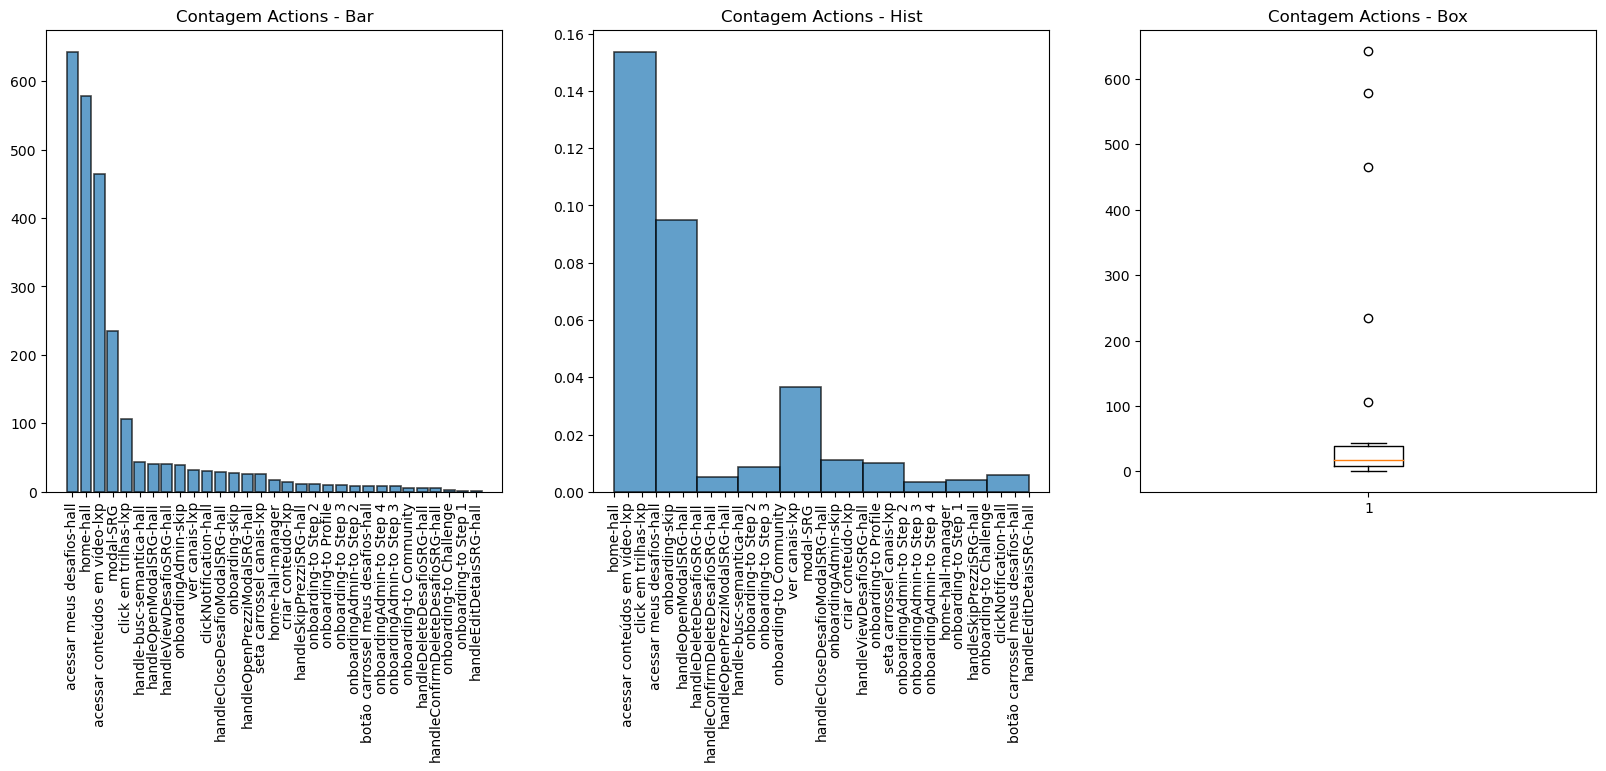

In [8]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(df_paths['Actions'], df_paths['Count'], edgecolor='black', linewidth=1.2, alpha=0.7)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Bar')

plt.subplot(1,3,2)
plt.hist(paths_list_t, edgecolor='black', linewidth=1.2, alpha=0.7, density=True)
plt.xticks(rotation=90)
plt.title('Contagem Actions - Hist')

plt.subplot(1,3,3)
plt.boxplot(df_paths['Count'])
plt.title('Contagem Actions - Box')
plt.show()

In [9]:
organizations2 = []
paths = []
for k,v in dic_pathPorOrg.items():
    organizations2.append(k)
    paths.append(v)

df_pathPorOrg = pd.DataFrame({
    'organization_id': organizations2,
    'Paths': paths
})

In [10]:
df_pathPorOrg.head(20)

,organization_id,Paths
0,4f3e63d2-43f8-4886-addc-9ce039eab5f1,"{click em trilhas-lxp, home-hall, acessar cont..."
1,4adb5f9b-f50a-4957-a7e3-94c3452d877c,"{home-hall, acessar meus desafios-hall, acessa..."
2,c81fa8b0-52c0-4a31-abb7-6776a76cc9c8,"{click em trilhas-lxp, home-hall, acessar meus..."
3,d3400673-a5b2-4914-bf57-ce98dc710603,"{handleConfirmDeleteDesafioSRG-hall, handleOpe..."
4,347ceb13-8656-4ed0-b080-c6cfb5528b25,{home-hall}
5,9e3e7a95-c6f5-4b6f-b189-8f33e45ee425,"{home-hall, acessar meus desafios-hall, handle..."
6,50ca2381-2d91-4d7e-8300-bb625d5cb97f,"{home-hall, acessar meus desafios-hall, acessa..."
7,abba8235-15bd-4285-90b4-104e9308013e,"{onboarding-to Step 3, onboarding-to Community..."
8,6019ee26-09c3-422e-8c25-0abe878d1a73,"{ver canais-lxp, click em trilhas-lxp, acessar..."
9,c8c88852-b101-4b47-aaca-4cee45368c9f,"{modal-SRG, acessar meus desafios-hall, handle..."


In [11]:
x = np.linspace(0,30,1001)
fx = (stats.norm.pdf(x, loc=mean, scale=dp))

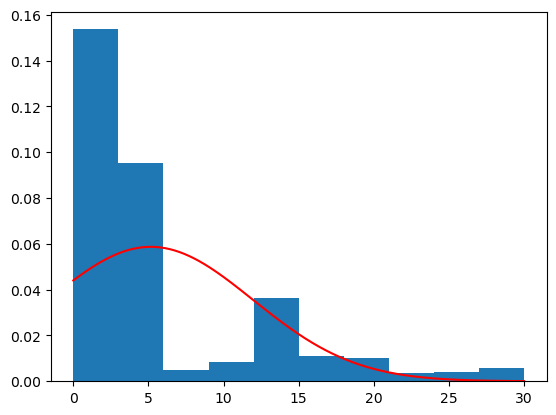

In [12]:
plt.hist(novo_path_list, density=True)
plt.plot(x, fx, color='red')
plt.show()

In [13]:
testando = df['path_actions']
actions = pd.DataFrame({ 'from':[], 'to':[], 'value':[]})
from_ = list(actions['from'])
to_ = list(actions['to'])
value_ = []
counts = {}
saidas_totais = {}

for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]

            from_.append(e)
            to_.append(e_1)

            if (e,e_1) not in counts.keys():
                counts[(e,e_1)] = 1
            else:
                counts[(e,e_1)] += 1

            if e not in saidas_totais.keys():
                saidas_totais[e] = 1
            else:
                saidas_totais[e] += 1
actions['from'] = from_
actions['to'] = to_


for lista in testando:
    lista_x = ast.literal_eval(lista)
    len_lista = len(lista_x)
    for i,e in enumerate(ast.literal_eval(lista)):
        if i + 1 < len_lista:
            # print(e)
            # print(ast.literal_eval(lista)[i+1])
            # print('---')
            e_1 = ast.literal_eval(lista)[i+1]
            value_.append(int((counts[(e, e_1)])/(max(counts.values())/10)))
actions['value'] = value_


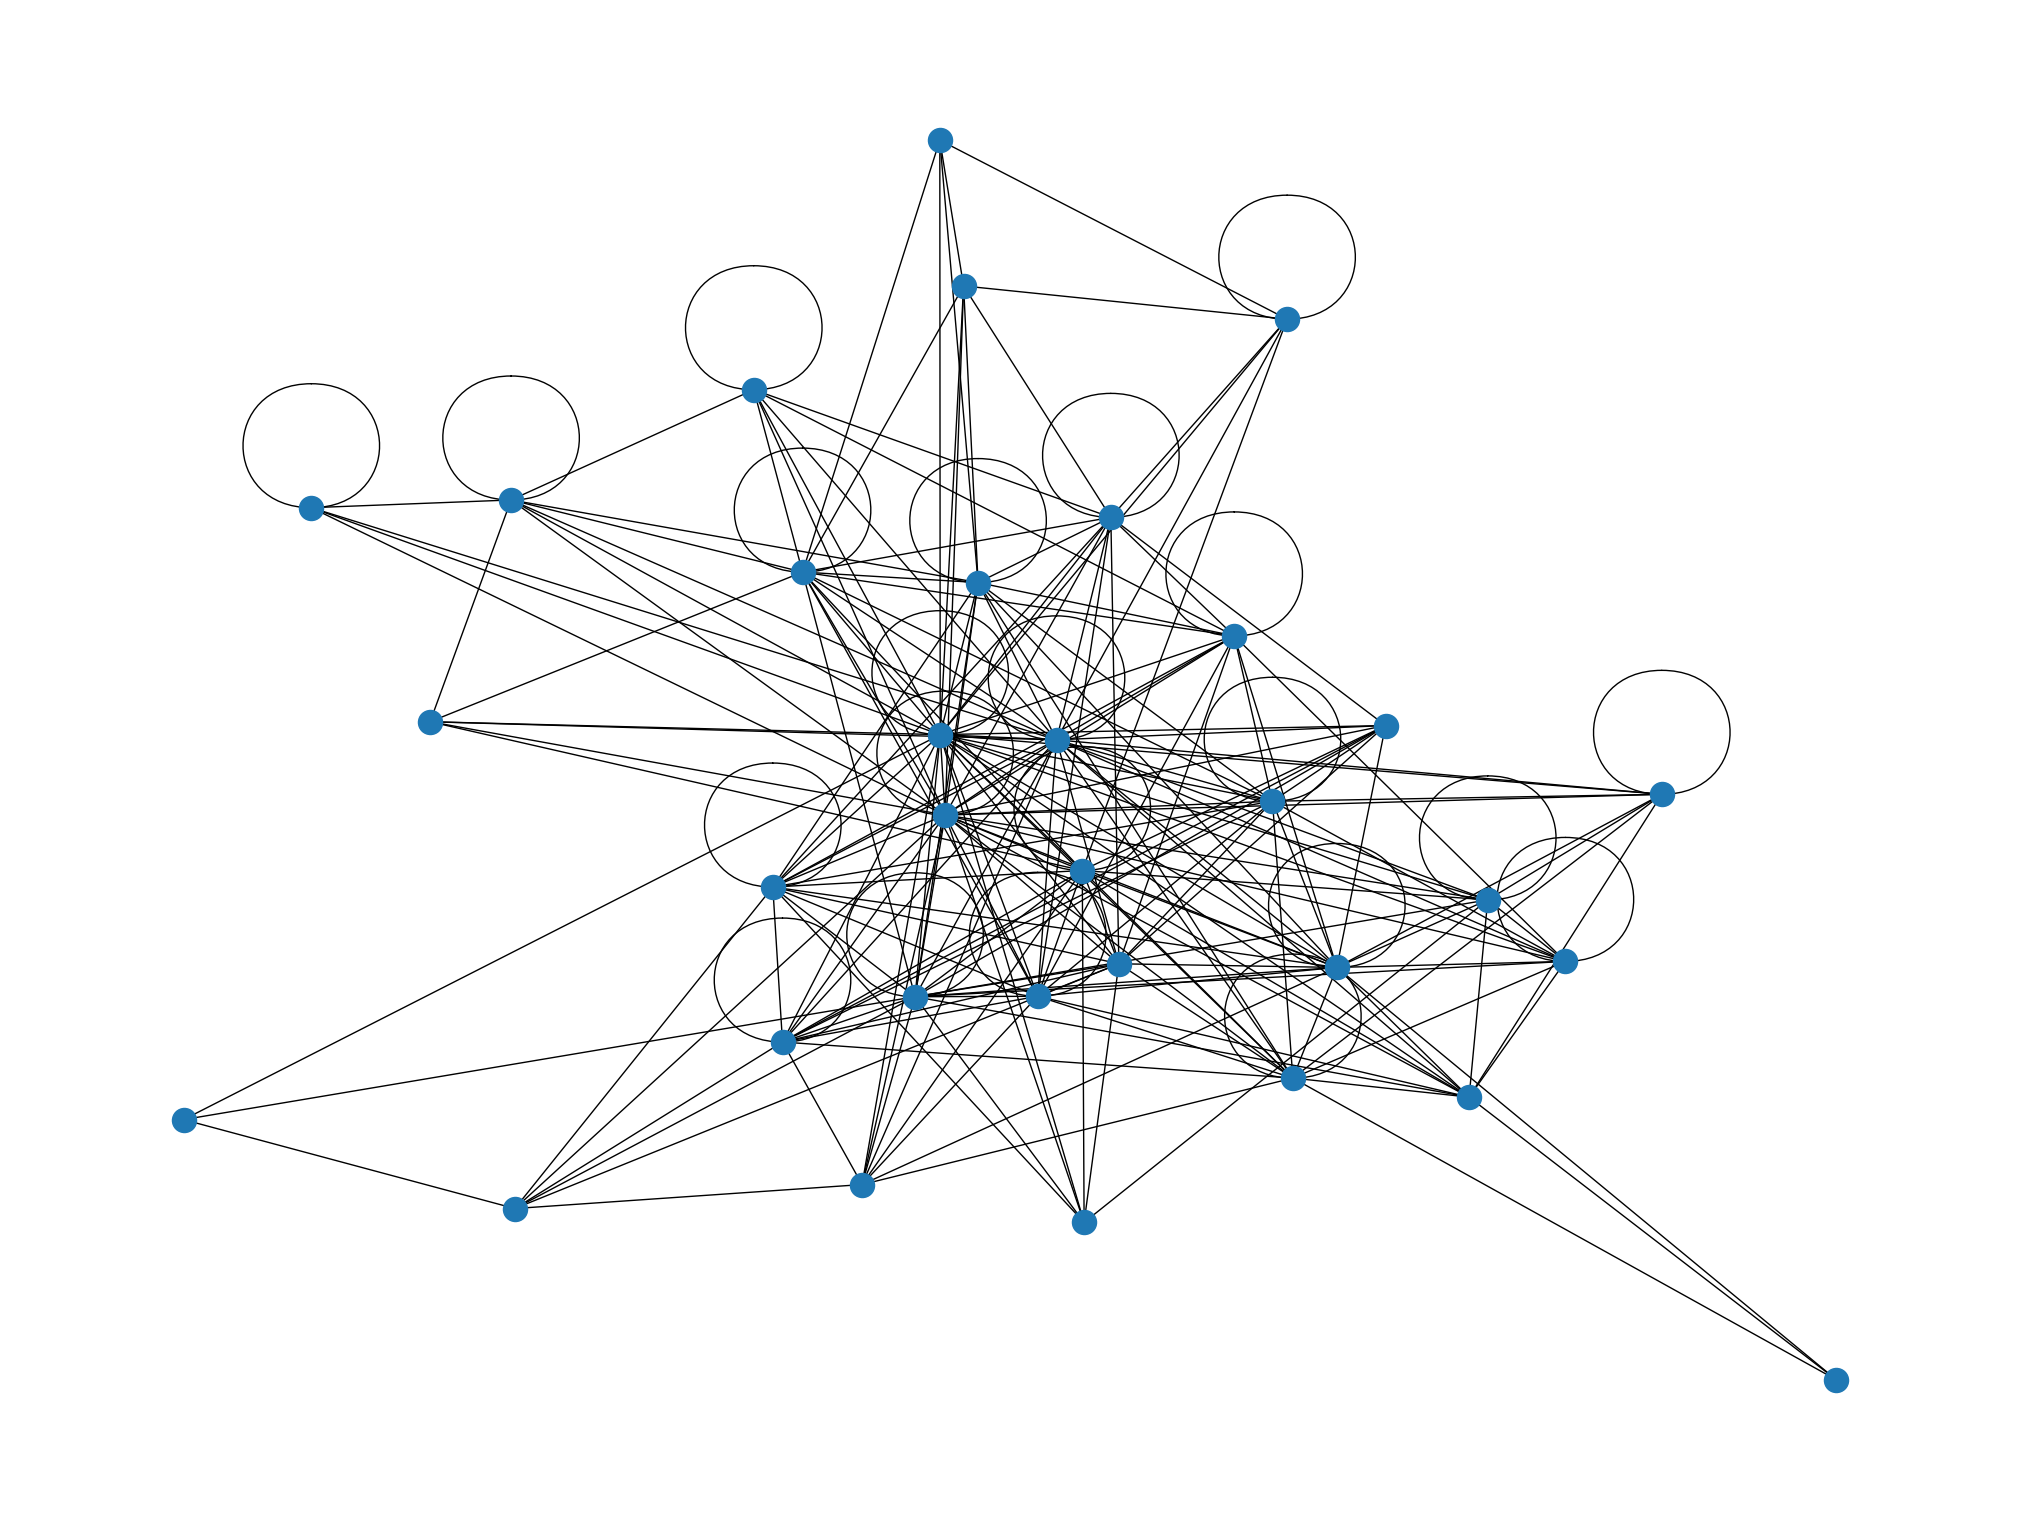

In [14]:
plt.figure(figsize=(20,15))
G = nx.from_pandas_edgelist(actions, 'from', 'to')

nx.draw(G, with_labels=False) #add cores e frequencia
plt.show()


In [15]:
# # libraries
# import pandas as pd
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
 
# # Build a dataframe with your connections
# df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
 
# # Build your graph
# G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# # Custom the nodes:
# nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)

# CRIANDO MATRIX DE TRANSIÇÃO

In [16]:
total = sum(counts.values())
counts_freq = counts
for k,v in counts_freq.items():
    counts_freq[k] = v/saidas_totais[k[0]]

In [17]:
matrix = pd.DataFrame()
for k in action_d.keys():
    matrix[k] = 0
    matrix.loc[k] = 0

for k,v in counts_freq.items():
    matrix.loc[k[0], k[1]] = v


In [18]:
print(matrix.loc['home-hall', 'onboarding-skip']) #linha, coluna

0.0046048537647790915


In [19]:
matrix = matrix.fillna(0)
matrix

,home-hall,acessar conteúdos em vídeo-lxp,click em trilhas-lxp,acessar meus desafios-hall,onboarding-skip,handleOpenModalSRG-hall,handleDeleteDesafioSRG-hall,handleConfirmDeleteDesafioSRG-hall,handleOpenPrezziModalSRG-hall,handle-busc-semantica-hall,...,onboardingAdmin-to Step 4,home-hall-manager,onboarding-to Step 1,handleSkipPrezziSRG-hall,onboarding-to Challenge,clickNotification-hall,botão carrossel meus desafios-hall,handleEditDetaisSRG-hall,click em módulos-lxp,handleCancelDeleteDesafioSRG-hall
home-hall,0.582078,0.179340,0.000000,0.176105,0.004605,0.007716,0.000000,0.000000,0.002614,0.008339,...,0.000124,0.007841,0.000000,0.000000,0.000000,0.014935,0.000000,0.000124,0.000000,0.000000
acessar conteúdos em vídeo-lxp,0.055984,0.559124,0.294097,0.024762,0.001435,0.000179,0.000000,0.000000,0.000000,0.002512,...,0.000000,0.001794,0.000000,0.000000,0.000000,0.001077,0.000000,0.000000,0.007716,0.000000
click em trilhas-lxp,0.319149,0.567698,0.010638,0.063830,0.010638,0.000967,0.000000,0.000000,0.000000,0.002901,...,0.000000,0.000967,0.000000,0.000000,0.000000,0.008704,0.000000,0.000000,0.000000,0.000000
acessar meus desafios-hall,0.074232,0.026924,0.000000,0.589747,0.002890,0.050198,0.007454,0.000000,0.039550,0.002586,...,0.000000,0.001065,0.000000,0.002434,0.000000,0.001977,0.014147,0.007301,0.000000,0.000000
onboarding-skip,0.124812,0.001504,0.000000,0.009023,0.533835,0.012030,0.000000,0.000000,0.010526,0.000000,...,0.000000,0.000000,0.012030,0.000000,0.037594,0.000000,0.000000,0.000000,0.000000,0.000000
handleOpenModalSRG-hall,0.015260,0.001795,0.000000,0.012567,0.000000,0.018851,0.001795,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008079,0.000000,0.000000,0.000000,0.000898,0.000000,0.000000
handleDeleteDesafioSRG-hall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932584,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067416
handleConfirmDeleteDesafioSRG-hall,0.333333,0.111111,0.000000,0.125000,0.013889,0.055556,0.097222,0.000000,0.138889,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000
handleOpenPrezziModalSRG-hall,0.018617,0.000000,0.000000,0.021277,0.000000,0.515957,0.000000,0.000000,0.013298,0.000000,...,0.000000,0.000000,0.000000,0.414894,0.000000,0.000000,0.005319,0.002660,0.000000,0.000000
handle-busc-semantica-hall,0.141414,0.070707,0.003367,0.124579,0.003367,0.000000,0.000000,0.000000,0.000000,0.639731,...,0.000000,0.003367,0.000000,0.000000,0.000000,0.006734,0.000000,0.000000,0.000000,0.000000


In [20]:
teste = list(matrix.loc['home-hall', :])
sum(teste)

0.9999999999999999

# MONTE CARLO

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## TESTANDO

In [21]:
medias = []

for i in range(0,500):
    l_aux = random.choices(novo_path_list, k=2000)
    # l_aux = np.random.normal(loc=mean, scale=dp, size=20)
    medias.append(np.mean(l_aux))


mm = np.mean(medias)
upper = np.quantile(medias, 0.975)
lower = np.quantile(medias, 0.025)
print(mm, lower, upper)


5.143479999999999 4.8507375 5.4300250000000005


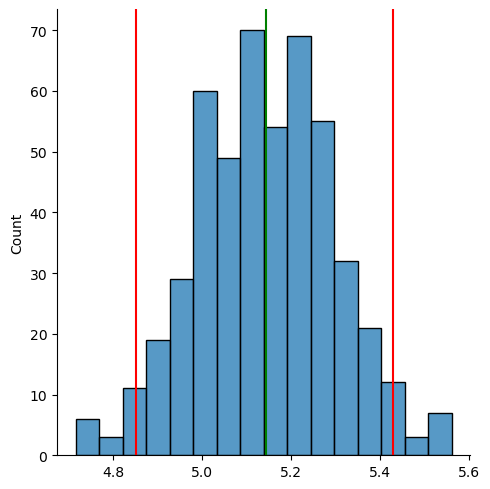

In [22]:
sns.displot(medias)

plt.axvline(lower, color='red')
plt.axvline(upper, color='red')
plt.axvline(mm, color='green')
plt.show()



## COMEÇO

In [23]:
originais = pd.read_excel('caminhos_originais.xlsx')
path_actions = df['path_actions']
contagem = {}
caminhos = originais['caminho']
repetidos = []
i = 0
for caminho in caminhos:
    for path in path_actions:
        if path == caminho:
            if originais['nome_caminho'][i] not in contagem.keys():
                contagem[originais['nome_caminho'][i]] = 1
            else:
                contagem[originais['nome_caminho'][i]] += 1
            repetidos.append(originais['nome_caminho'][i])
    i += 1
originais['contagem'] = contagem.values()

total = originais['contagem'].sum()
originais['contagem'] = originais['contagem']/total
pesos = originais['contagem']

In [24]:
originais

,Unnamed: 0,nome_caminho,caminho,contagem
0,0,caminho_0,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.049917
1,1,caminho_1,"['onboardingAdmin-skip', 'home-hall', 'acessar...",0.026622
2,2,caminho_4,"['home-hall', 'acessar meus desafios-hall', 'h...",0.039933
3,3,caminho_5,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.354409
4,4,caminho_6,"['home-hall', 'acessar conteúdos em vídeo-lxp']",0.038270
...,...,...,...,...
59,59,caminho_70,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.006656
60,60,caminho_71,"['home-hall', 'acessar conteúdos em vídeo-lxp'...",0.008319
61,61,caminho_72,"['home-hall', 'home-hall', 'acessar meus desaf...",0.009983
62,62,caminho_73,"['home-hall', 'clickNotification-hall', 'home-...",0.006656


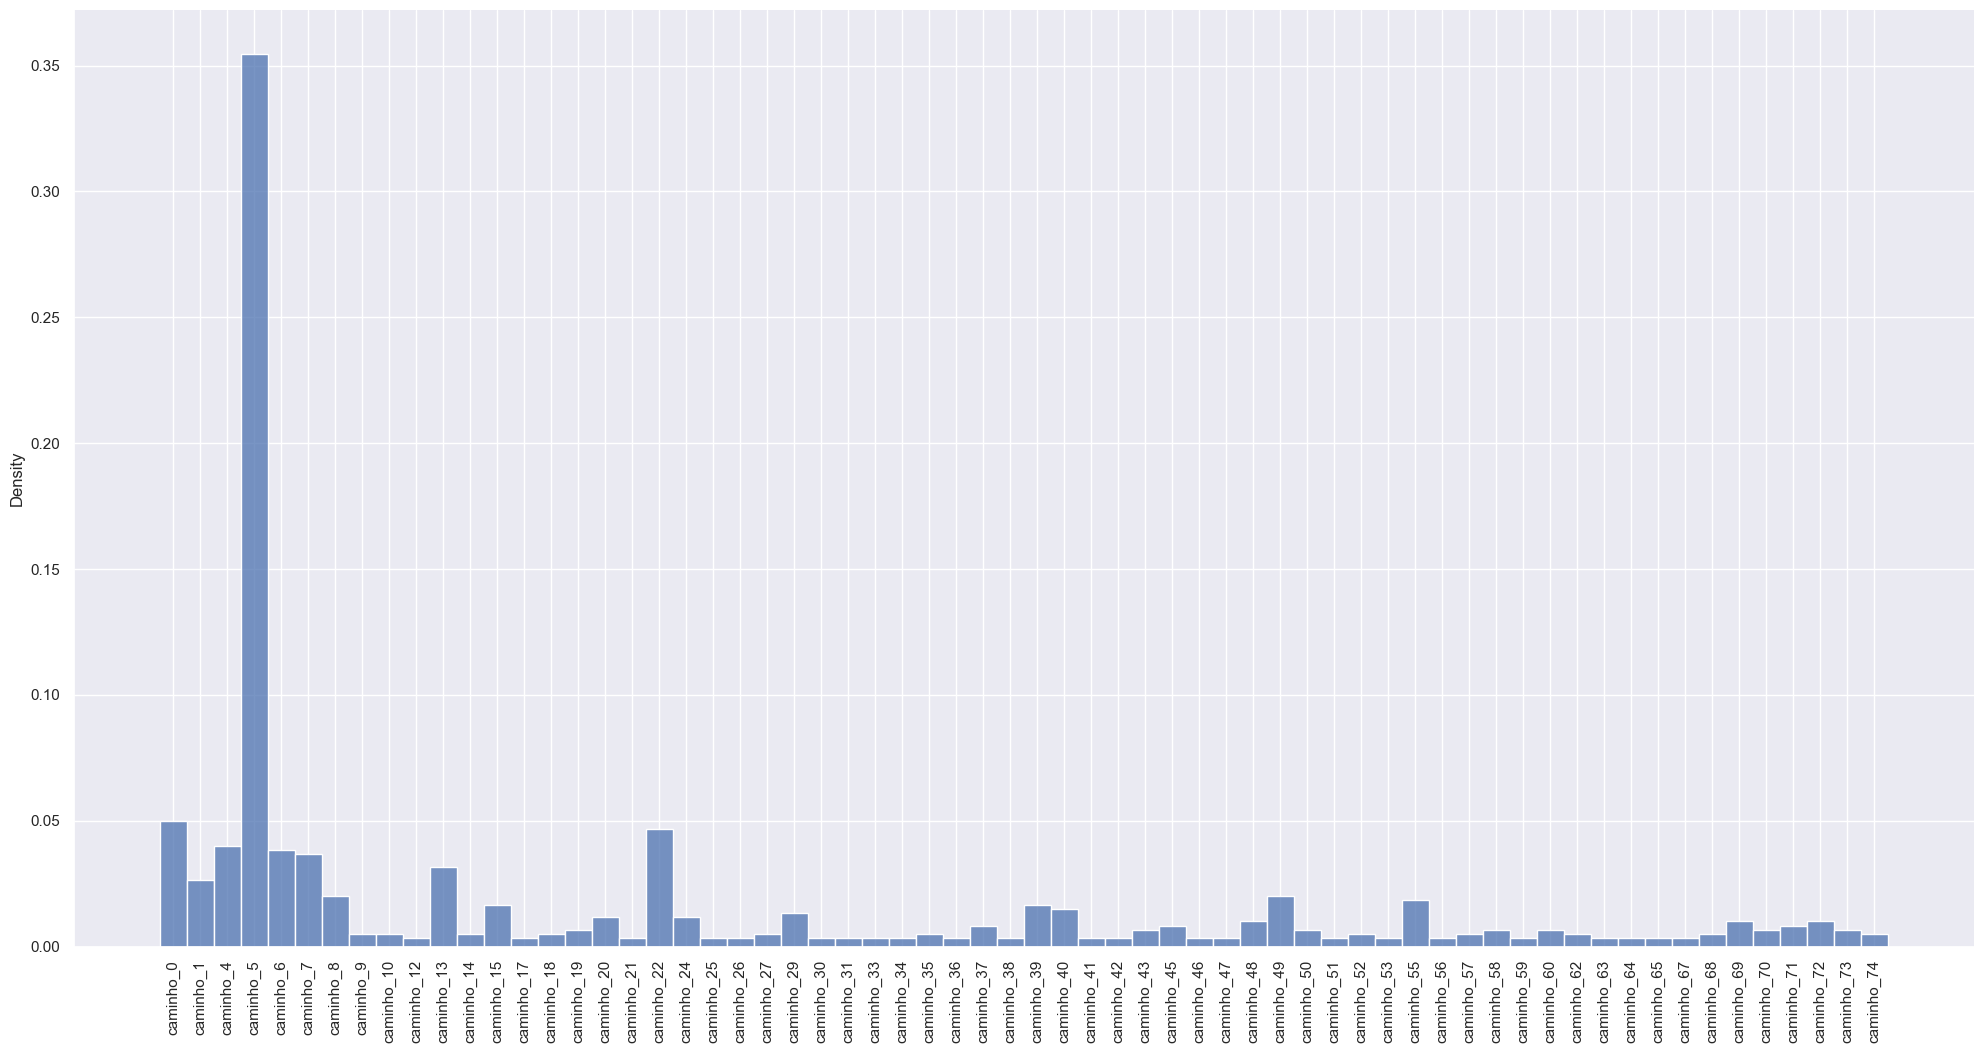

In [25]:
sns.set_theme(rc={
    
})
sns.displot(repetidos, height=10, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()


In [26]:
modes = []

for i in range(0,50000):
    l_aux = random.choices(originais['caminho'], weights=pesos ,k=100)
    # modes.append(stats.mode(l_aux))


# mm = stats.mode(modes)
# upper = np.quantile(modes, 0.975)
# lower = np.quantile(modes, 0.025)
# print(mm)


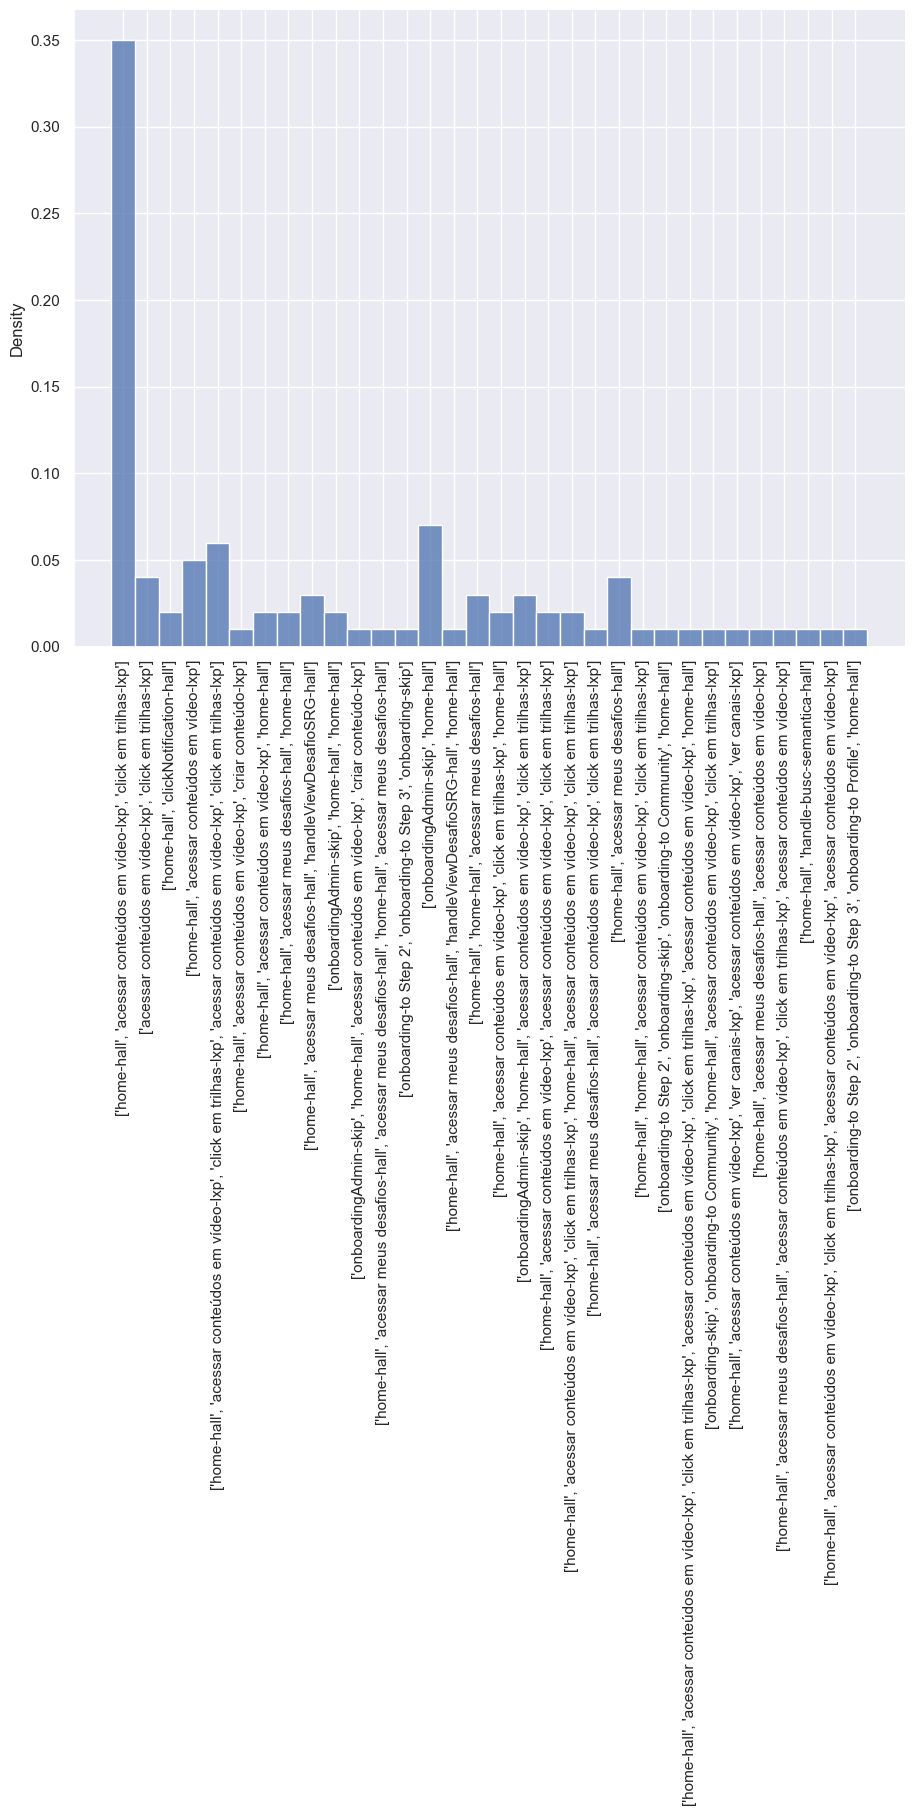

In [27]:
sns.displot(l_aux, height=7, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()

In [56]:
matrix.columns

Index(['home-hall', 'acessar conteúdos em vídeo-lxp', 'click em trilhas-lxp',
       'acessar meus desafios-hall', 'onboarding-skip',
       'handleOpenModalSRG-hall', 'handleDeleteDesafioSRG-hall',
       'handleConfirmDeleteDesafioSRG-hall', 'handleOpenPrezziModalSRG-hall',
       'handle-busc-semantica-hall', 'onboarding-to Step 2',
       'onboarding-to Step 3', 'onboarding-to Community', 'ver canais-lxp',
       'modal-SRG', 'handleCloseDesafioModalSRG-hall', 'onboardingAdmin-skip',
       'criar conteúdo-lxp', 'handleViewDesafioSRG-hall',
       'onboarding-to Profile', 'seta carrossel canais-lxp',
       'onboardingAdmin-to Step 2', 'onboardingAdmin-to Step 3',
       'onboardingAdmin-to Step 4', 'home-hall-manager',
       'onboarding-to Step 1', 'handleSkipPrezziSRG-hall',
       'onboarding-to Challenge', 'clickNotification-hall',
       'botão carrossel meus desafios-hall', 'handleEditDetaisSRG-hall',
       'click em módulos-lxp', 'handleCancelDeleteDesafioSRG-hall'],
     

In [57]:
matrix_np = matrix.to_numpy()
Po = np.array([0]*33)
Po[0] = 1
home_hall_progresso = []
acessar_desafios_progresso = []
click_trilhas_progresso = []
acessar_conteudos_progresso = []
i = 0
for i in tqdm(range(1000000)):
    home_hall_progresso.append(Po[0])
    acessar_desafios_progresso.append(Po[3])
    click_trilhas_progresso.append(Po[2])
    acessar_conteudos_progresso.append(Po[1])

    Po = np.matmul(Po, matrix_np)

print(sum(Po))
print(Po)

  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [00:10<00:00, 97299.51it/s]

0.9999999999999976
[1.76567057e-01 1.95666017e-01 5.88890427e-02 1.99321078e-01
 7.92065450e-03 3.46691944e-02 2.86176324e-03 2.66883538e-03
 1.12803814e-02 9.81427789e-03 1.83111370e-03 1.75317233e-03
 1.85035783e-03 6.21818899e-03 1.88599419e-01 2.69936481e-02
 2.66598817e-03 2.27125676e-03 2.70404849e-02 1.13559886e-03
 4.74772921e-03 7.88755205e-04 7.18188820e-04 6.64678373e-04
 2.76916836e-03 1.56997276e-04 5.49036135e-03 4.81400570e-04
 9.75628465e-03 1.00573949e-02 2.49920329e-03 1.65937931e-03
 1.92927859e-04]


In [81]:
df_progresso = pd.DataFrame({
    'Steps': np.arange(0,100,1),
    'Home Hall': home_hall_progresso[0:100],
    'Acessar conteudos': acessar_conteudos_progresso[0:100],
    'Clicar trilhas': click_trilhas_progresso[0:100],
    'Acessar desafios': acessar_desafios_progresso[0:100]
})

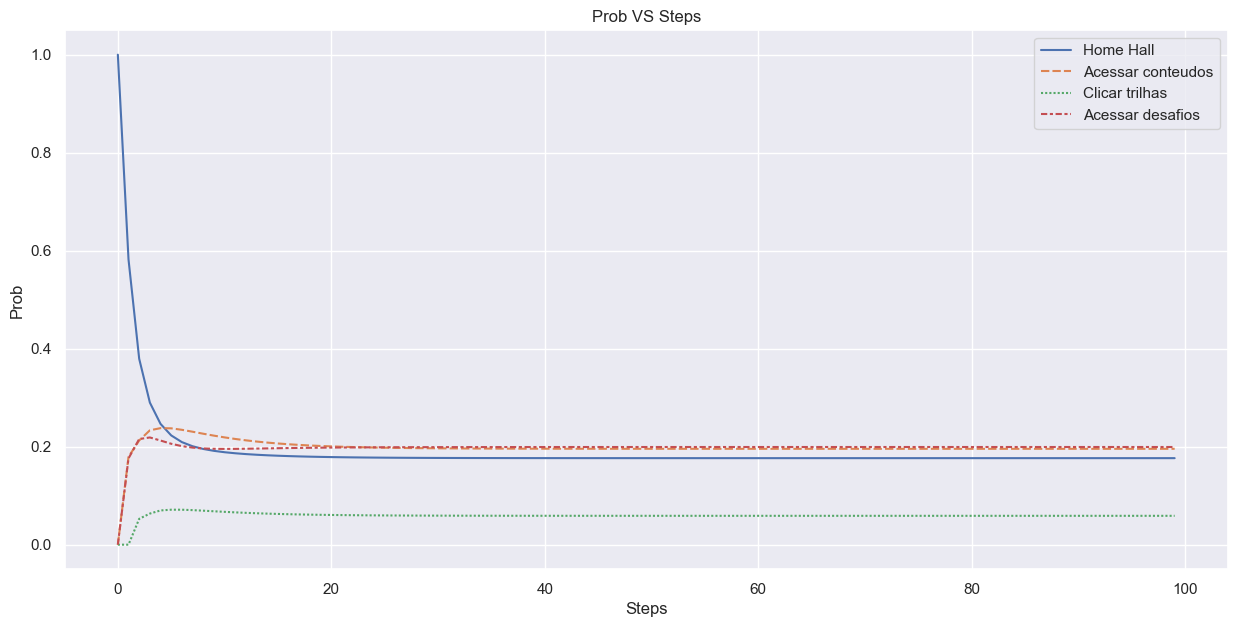

In [94]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_progresso[['Home Hall', 'Acessar conteudos', 'Clicar trilhas', 'Acessar desafios']])
plt.xlabel('Steps')
plt.ylabel('Prob')
plt.title('Prob VS Steps')
plt.show()

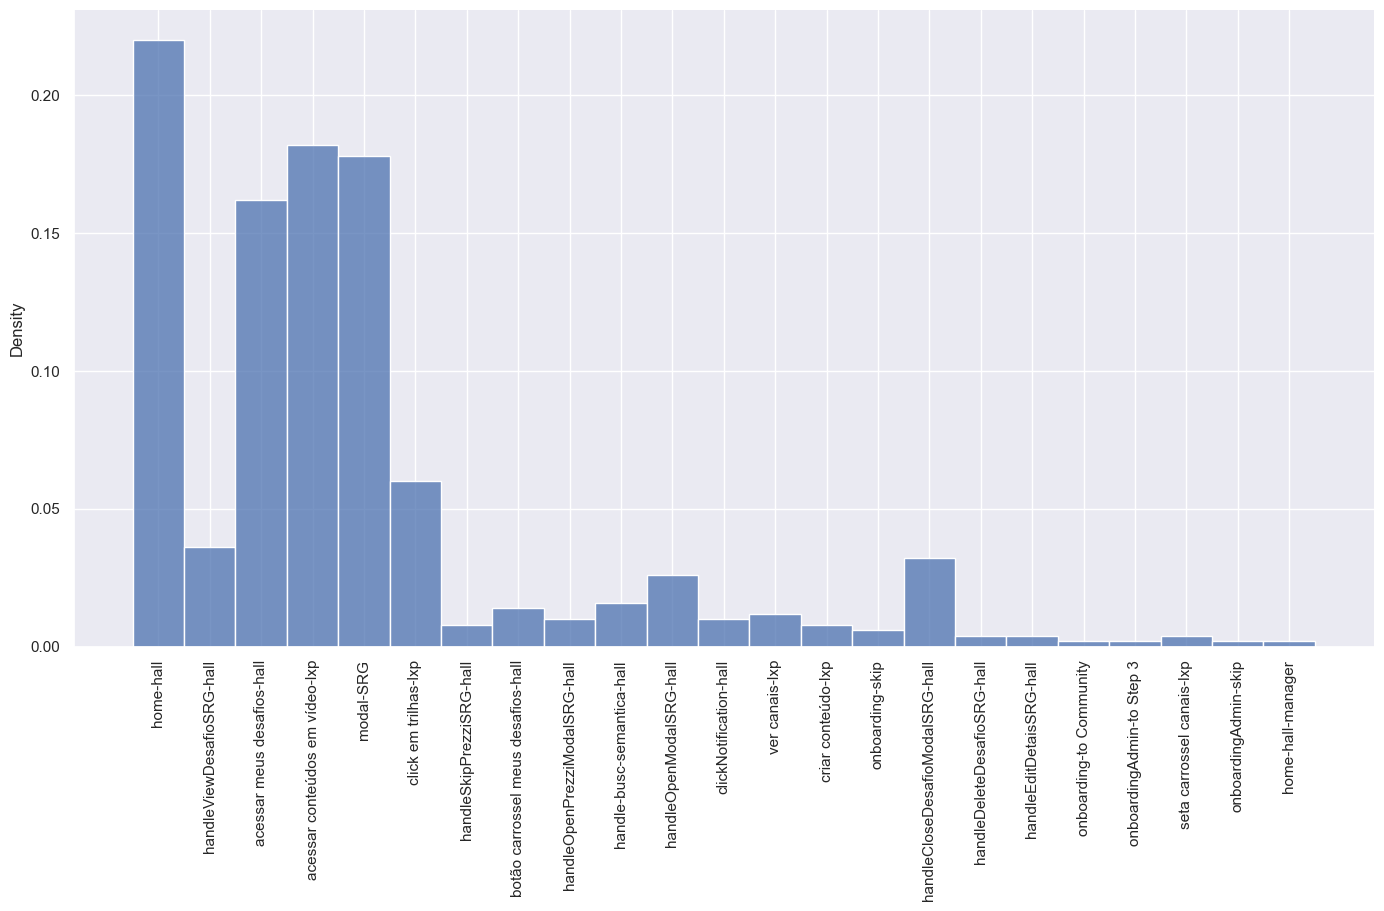

In [44]:
for i in range(0,50000):
    l_aux = random.choices(matrix.columns, weights=Po ,k=500)
    
sns.displot(l_aux, height=7, aspect=2, kind='hist', stat='density')
plt.xticks(rotation=90)
plt.show()

# PI

In [30]:
x_list = [np.random.uniform(-1,1) for _ in range(100)]
y_list = [np.random.uniform(-1,1) for _ in range(100)]

In [31]:
red = []
red_x = []
red_y = []
all_x = []
all_y = []
all_points = []
i = 0
while i < len(x_list):

    if (x_list[i])**2 + (y_list[i])**2 <= 1:
        red_x.append(x_list[i])
        red_y.append(y_list[i])
        red.append((x_list[i], y_list[i]))
        
    all_points.append((x_list[i], y_list[i]))
    all_x.append(x_list[i])
    all_y.append(y_list[i])

    i += 1



(-2.0, 2.0)

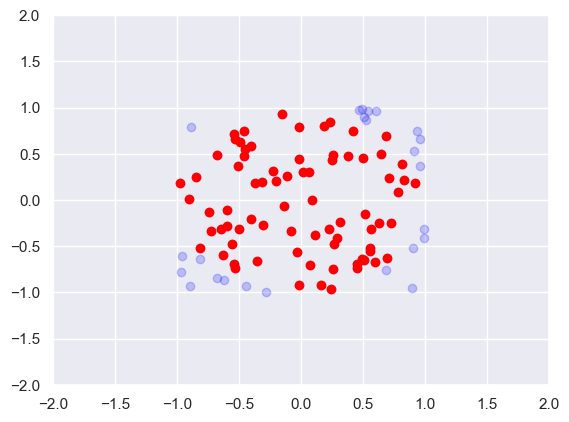

In [32]:
plt.scatter(all_x, all_y, color='blue', alpha=0.2)
plt.scatter(red_x, red_y, color='red')

plt.xlim(-2,2)
plt.ylim(-2,2)

In [33]:
nRed = len(red_x)
nAll = len(all_x)
pi = 4 * (nRed/nAll)

print(pi)

3.04
